# Laboration 1 - Ekvationer och Differensformler

#### Eric Johansson, Can Kupeli, Samuel Greenberg

In [47]:
import math
import numpy as np
import sympy as sy 
from matplotlib import pyplot as plt 

## Uppgift 1

In [48]:
def f(x):
	return (math.sqrt(math.pow(x-5,5))+2*math.cos(math.pi*math.sqrt(x)))/(math.sqrt(x+4*math.log(x-math.pi))-1)

def forward_diff(f,x,h):
	return (f(x+h)-f(x))/h

def center_diff(f,x,h):
	return (f(x+h)-f(x-h))/(2*h)

x0 = 7
for h in [0.04, 0.02, 0.01]:
	print(f"Framåtderivatan  med h={h} => {forward_diff(f,x0,h)}")
	print(f"Centralderivatan med h={h} => {center_diff(f,x0,h)}")

Framåtderivatan  med h=0.04 => 2.2009998703276854
Centralderivatan med h=0.04 => 2.164862077706964
Framåtderivatan  med h=0.02 => 2.1829004610484315
Centralderivatan med h=0.02 => 2.1648314358760854
Framåtderivatan  med h=0.01 => 2.173858304372933
Centralderivatan med h=0.01 => 2.164823775679292


Resultaten visar att $D2$, centraldifferensen, är närmre det verkliga värdet av $f'(x_0)$. Detta är eftersom den har feltermen
$O(h^2)$ medan framåtdiffensen har $O(h)$. Eftersom $h<1$ kommer feltermen i $O(h^2)$ konvergera mot $0$ snabbare än $O(h)$.

## Uppgift 2

In [49]:
x = sy.symbols("x")
f_syms = (sy.sqrt((x-5)**5) + 2*sy.cos(sy.pi*sy.sqrt(x)))/(sy.sqrt(x+4*sy.log(x-sy.pi))-1)
f_prim = f_syms.diff()
f_prim_x0 = f_prim.subs(x,x0)
print(f"Exakta värdet av f'(7) är {f_prim_x0.evalf(16)}")

Exakta värdet av f'(7) är 2.164821222303575


Svaret blev 2.164821222303575 vilket är samma som det i instruktionen. Att arbeta symboliskt betyder att datorn hanterar $x$ som en symbol istället för ett värde som den gör när vi arbetar numeriskt. Det är därför vi behöver byta ut x mot 7 (subs(x,7)) för att få ut ett numeriskt uttryck.

## Uppgift 3

In [50]:
# f kommer från Uppgift 1
h = 2e-2
k1= 2*(2*f(x0+h/2)-f(x0+h)-f(x0))/(h**2)

f_prim_x0 = (f(x0+h)-f(x0))/h+k1*h
print(f"Uppskattade värdet av f'({x0}) med extrapolering är {f_prim_x0}")

Uppskattade värdet av f'(7) med extrapolering är 2.164816147697435


Eftersom $h$ fortfarande är relativt stort kommer det fortfarande ifrån det riktiga värdet. Det är trots allt fortfarande en approximation

## Uppgift 4

In [51]:
# f kommer från Uppgift 1, f_prim kommer från Uppgift 2, x0 från Uppgift 1, h kommer från Uppgift 3

# Vanlig numerisk
def forward_biss(f,x,h):
    return (f(x-h)-2*f(x)+f(x+h))/(h**2)

print(f"Fbiss utan extrapolering => {forward_biss(f,x0,h)}")

biss1 = forward_biss(f,x0,h)
biss2 = forward_biss(f,x0,2*h)
richardson = (4*biss1-biss2)/3
print(f"Fbiss med extrapolering  => {richardson}")
# Extrapolerad numerisk

# Symbolisk
f_biss = f_prim.diff()
f_biss_x0 = f_biss.subs(x,7)
print(f'Exakta värdet av f"(7)   => {f_biss_x0.evalf(17)}')


Fbiss utan extrapolering => 1.8069025172345876
Fbiss med extrapolering  => 1.8069068126340866
Exakta värdet av f"(7)   => 1.8069068125500986



Återigen ser vi att det extrapolerade värdet är närmre det riktiga än det vanliga. Däremot är skillnaden inte markant.


## Uppgift 5

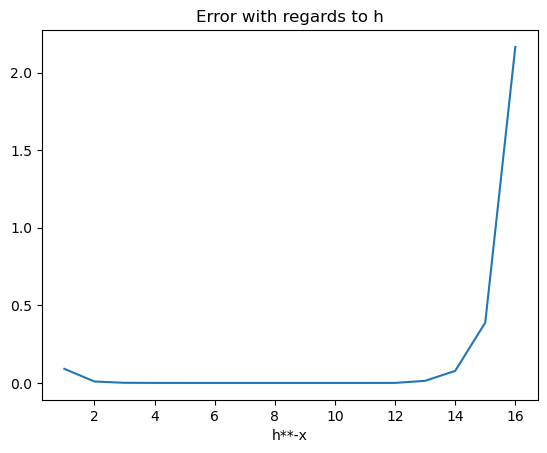

In [52]:
import sys 
eps = sys.float_info.epsilon

all_h = []
y = []
for h in range(1,17):
    y.append(abs(forward_diff(f,x0,1/10**h)-2.164821222303575))
    all_h.append(h)

plt.plot(all_h,y )
plt.title("Error with regards to h")
plt.ylabel("Error")
plt.xlabel("h**-x")
plt.show()

Den bästa värdet på $h$ fås genom att använda $h\approx x\sqrt{\epsilon}$ vilket i detta fall var runt 1.043e-07
Efter det blev approximationen sämre och sämre och kring $\epsilon$ belv den lika med 0.

Vid för små värden kommer det bli för stora avrundningsfel vid beräkningen och därför får vi inte några bra svar. En god tumregel är att använda formeln $h=x_0\sqrt{\epsilon}$ om $x\neq 0$ 

## Uppgift 6

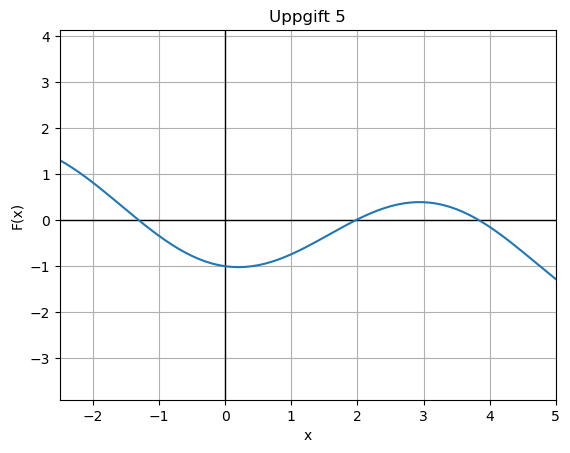

In [53]:
# Array från -15 till 15 med steglängd 0.1
x = np.arange(-15,15,0.1)

# Funktion-stil
def F(x):
	return -x/5-np.cos(x)

# Numpy-stil
y = -x/5-np.cos(x)

# Plot styling
plt.title("Uppgift 5") 
plt.xlabel("x") 
plt.ylabel("F(x)") 
plt.xlim(-2.5,5) 
plt.grid()
plt.axhline(linewidth = 1, color = "black")
plt.axvline(linewidth = 1, color = "black")


#plt.plot(x,F(x))
plt.plot(x,y)
plt.show()


Vi kan se att det finns 3 nollställen nära -1.3, 2 och 3.8

## Uppgift 7

In [54]:
# Lambdastil
f = lambda x: -x/5 - np.cos(x)
f_prim = lambda x: -1/5 + np.sin(x)

# Vanlig funktionsstil

#def f(x):
#	return -x/5-math.cos(x)

# def f_prim(x):
# 	return -1/5+math.sin(x)

tolerance = 1e-6
def newton_rhapson(f, f_prim, x0, tolerance):
	newton_rhapson.counter += 1
	if abs(f(x0)) < tolerance:
		return x0 
	else:
		return newton_rhapson(f,f_prim,x0 - f(x0)/f_prim(x0),tolerance)

newton_rhapson.counter = 0
print(f"Estimate when starting at  4   =  {newton_rhapson(f,f_prim, 4 ,tolerance)} and took {newton_rhapson.counter} iterations with tolerance {tolerance}")
print(f"Estimate when starting at -1.3 = {newton_rhapson(f,f_prim, -1.3 ,tolerance)} and took {newton_rhapson.counter} iterations with tolerance {tolerance}")
print(f"Estimate when starting at  2   =  {newton_rhapson(f,f_prim, 2 ,tolerance)} and took {newton_rhapson.counter} iterations with tolerance {tolerance}")
# print(f"Estimate when starting at 3 = {newton_rhapson(f,f_prim, 3 ,tolerance)} and took {newton_rhapson.counter} iterations with tolerance {tolerance}")

Estimate when starting at  4   =  3.837467107273312 and took 4 iterations with tolerance 1e-06
Estimate when starting at -1.3 = -1.3064400083720198 and took 7 iterations with tolerance 1e-06
Estimate when starting at  2   =  1.9773830233365421 and took 10 iterations with tolerance 1e-06


Om vi börjar med $x_0=3$ så konvergerar funktionen inte. Detta är eftersom derivatan är väldigt nära 0 i den punkten och därför kommer nästa approximation hamna långt bort. Detta kombinerat med att det finns flera lokala extrema mellan där och de vid de riktiga nollställena gör att den inte kommer tillbaka.

## Uppgift 8

In [55]:
# f kommer från Uppgift 6

def secant_method(f,left,right,tolerance):
	secant_method.counter += 1
	if abs(left-right) < tolerance:
		return left
	else:
		return secant_method(f,right, left-((left-right)*f(left))/(f(left)-f(right)), tolerance)

secant_method.counter = 0
print(f"Uppskattning med startvärde 4 och 5 => {secant_method(f,4, 5 ,tolerance)} och tog {secant_method.counter} iterationer med toleransen {tolerance}")

Uppskattning med startvärde 4 och 5 => 3.837467525012162 och tog 6 iterationer med toleransen 1e-06


Det som är bra med sekantmetoden är att man inte behöver veta derivatan av funktionen vilket man behöver i Newton Rhapson. Däremot behöver man ge två startvärden, till skillnad från Newton Rhapson där man endast behöver ge en.

## Uppgift 9

In [56]:
f = sy.sympify("-x/5-cos(x)")
print(f"Nollställe nr 1:  {sy.nsolve(f, 4)}")
print(f"Nollställe nr 2: {sy.nsolve(f,-1)}")
print(f"Nollställe nr 3:  {sy.nsolve(f, 2)}")

Nollställe nr 1:  3.83746710649905
Nollställe nr 2: -1.30644000836951
Nollställe nr 3:  1.97738302932884


Vi kan se att man mycket lätt kan beräkna nollställen med hjälp av inbyggda funktioner.